## Required libraries importation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Useful for seanolatity analysis

## Exploratory Data Analysis (EDA)

## Data Preparation Summary

1. **Loading Data & data description**: Loads the dataset and summarizes its structure, types, and key variables.

2. **Null values identification**: Identifies missing values across all columns to ensure data completeness.

3. **Duplicates record identification**: Flags and reviews any duplicate records that could bias the analysis.

### 1. Loading Data and data description

In [12]:
data = pd.read_csv("./data/data.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo                       6240 non-null   object 
 1   date                      6240 non-null   object 
 2   tv_impression             6240 non-null   int64  
 3   radio_impression          6240 non-null   int64  
 4   print_impression          6240 non-null   int64  
 5   search_impression         6240 non-null   int64  
 6   social_impression         6240 non-null   int64  
 7   competitor_sales_control  6240 non-null   float64
 8   sentiment_score_control   6240 non-null   float64
 9   tv_spend                  6240 non-null   float64
 10  radio_spend               6240 non-null   float64
 11  print_spend               6240 non-null   float64
 12  search_spend              6240 non-null   float64
 13  social_spend              6240 non-null   float64
 14  populati

In [14]:
data.describe()

,tv_impression,radio_impression,print_impression,search_impression,social_impression,competitor_sales_control,sentiment_score_control,tv_spend,radio_spend,print_spend,search_spend,social_spend,population,sales
count,6.240000e+03,6.240000e+03,6.240000e+03,6.240000e+03,6.240000e+03,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,8.851635e+05,5.206055e+05,2.605050e+05,1.806810e+06,9.816780e+05,-0.044412,-0.033675,6490.659147,5019.278558,1935.793164,14080.185617,7649.147993,542418.832750,211330.038098
std,8.193451e+05,6.206231e+05,5.551842e+05,1.304818e+06,9.141768e+05,1.210164,1.175572,6008.031135,5983.571424,4125.531614,10168.239254,7123.184932,242839.719887,121605.908396
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.825634,-4.230392,0.000000,0.000000,0.000000,0.000000,0.000000,136670.940000,9742.282233
25%,2.536458e+05,0.000000e+00,0.000000e+00,8.083565e+05,2.675945e+05,-0.872736,-0.808085,1859.914025,0.000000,0.000000,6299.393250,2085.072625,335176.345000,114323.174425
50%,6.796705e+05,3.106525e+05,0.000000e+00,1.505379e+06,7.462475e+05,-0.050346,-0.036433,4983.835500,2995.072650,0.000000,11731.178500,5814.694600,560478.825000,193995.582650
75%,1.324174e+06,8.075525e+05,2.547340e+05,2.566118e+06,1.476708e+06,0.743633,0.739391,9709.803000,7785.800675,1892.909150,19997.351500,11506.376500,736033.810000,287918.213625
max,5.192032e+06,4.397540e+06,5.610156e+06,7.635147e+06,6.975542e+06,3.924682,4.320259,38071.730000,42397.700000,41688.645000,59499.484000,54352.810000,994048.940000,739823.338900


In [15]:
data.head()

,geo,date,tv_impression,radio_impression,print_impression,search_impression,social_impression,competitor_sales_control,sentiment_score_control,tv_spend,radio_spend,print_spend,search_spend,social_spend,population,sales
0,Geo0,1/25/21,280668,0,0,470611,108010,-1.338765,0.115581,2058.0608,0.00000,0.00000,3667.3965,841.6044,136670.94,39198.55690
1,Geo0,2/1/21,366206,182108,19825,527702,252506,0.893645,0.944224,2685.2874,1755.74540,147.31808,4112.2974,1967.5044,136670.94,41497.96063
2,Geo0,2/8/21,197565,230170,0,393618,184061,-0.284549,-1.290579,1448.6895,2219.12230,0.00000,3067.4023,1434.1870,136670.94,41579.08885
3,Geo0,2/15/21,140990,66643,0,326034,201729,-1.034740,-1.084514,1033.8406,642.52057,0.00000,2540.7310,1571.8545,136670.94,56492.86151
4,Geo0,2/22/21,399116,164991,0,381982,153973,-0.319276,-0.017503,2926.6072,1590.71640,0.00000,2976.7249,1199.7440,136670.94,71039.82718


### 2. Null values identification

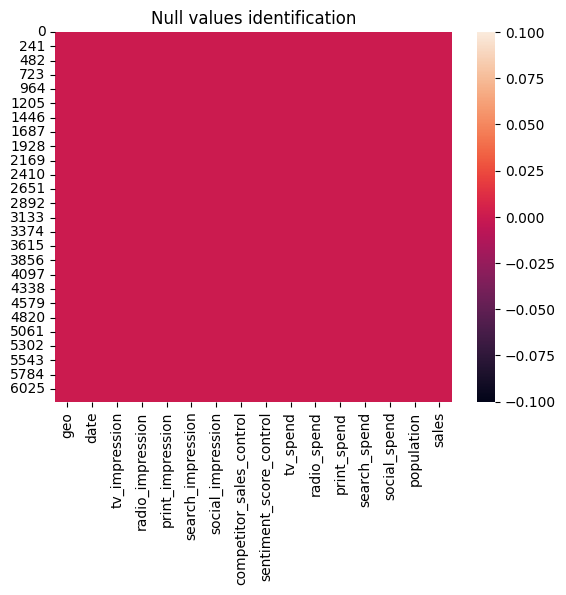

In [16]:
sns.heatmap(data.isnull())
plt.title("Null values identification")
plt.show()

In [17]:
print(f"Number of null values: {data.isnull().sum().sum()}")

Number of null values: 0


### 3. Duplicates detection

In [18]:
duplicates = data[data.duplicated()]
print(f"Number of duplicates records: {len(duplicates)}")

Number of duplicates records: 0


## Feature Correlation Analysis

1. **Heatmap Correlations (Pearson):**
   Visualizes linear relationships between numerical features using a correlation matrix.

2. **Correlation with Sales:**
   Identifies top features positively and negatively correlated with the `sales` variable.


### 1. Heatmap Correlations (Pearson)

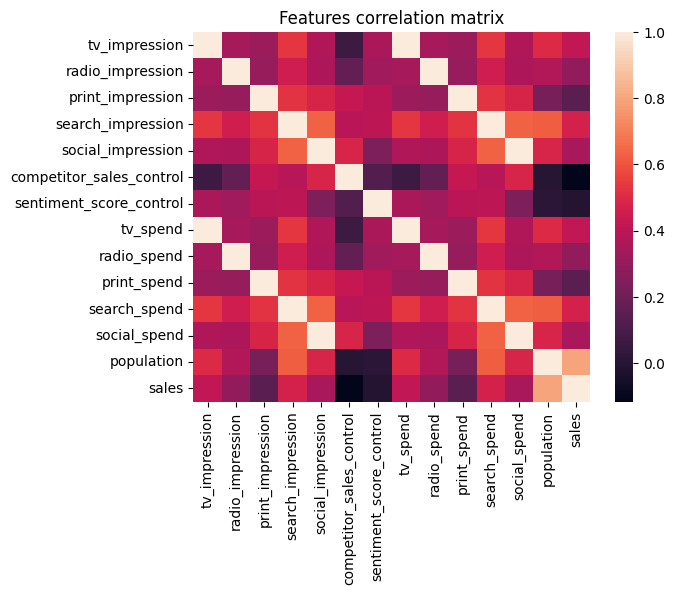

In [19]:
correlations = data.select_dtypes(include=['number']).corr()

sns.heatmap(correlations)
plt.title("Features correlation matrix")
plt.show()

### 2. Correlation with Sales

C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_28908\3542212750.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_28908\3542212750.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


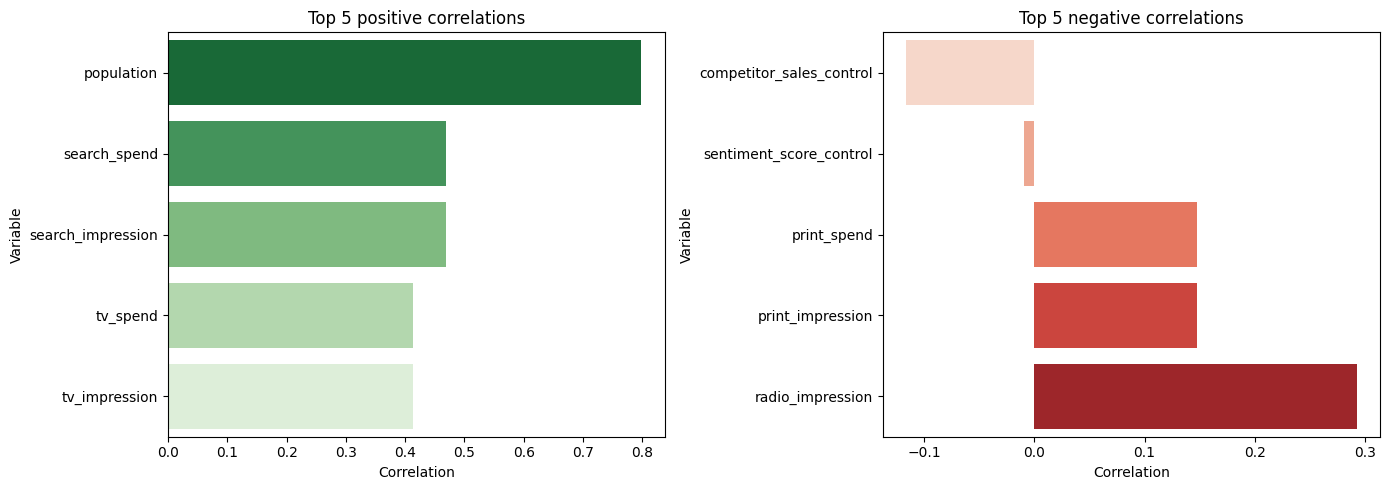

In [20]:
# Calcular correlaciones con 'sales'
numeric_cols = data.select_dtypes(include=['number'])
correlations = numeric_cols.corr()['sales'].drop('sales')

# Top 5 positivos y negativos
top_positive = correlations.sort_values(ascending=False).head(5).reset_index()
top_negative = correlations.sort_values(ascending=True).head(5).reset_index()

# Renombrar columnas
top_positive.columns = ['variable', 'correlation']
top_negative.columns = ['variable', 'correlation']

# Crear figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Gráfico de correlaciones positivas
sns.barplot(
    data=top_positive,
    x='correlation', y='variable',
    ax=axes[0], palette='Greens_r'
)
axes[0].set_title("Top 5 positive correlations")
axes[0].set_xlabel("Correlation")
axes[0].set_ylabel("Variable")

# Gráfico de correlaciones negativas
sns.barplot(
    data=top_negative,
    x='correlation', y='variable',
    ax=axes[1], palette='Reds'
)
axes[1].set_title("Top 5 negative correlations")
axes[1].set_xlabel("Correlation")
axes[1].set_ylabel("Variable")
plt.tight_layout()
plt.show()

## Feature Engineering

1. **Geo Feature Expansion:**
   Converts the `geo` categorical variable into multiple binary features using one-hot encoding.

2. **Date Transformation:**
   Extracts temporal components (month, sin/cos seasonality) from the `date` column for modeling.


### 1. Geo Feature Expansion

In [21]:
geo_dummies = pd.get_dummies(data['geo'],drop_first=True)

geo_dummies = geo_dummies.astype(int)

data = pd.concat([data, geo_dummies], axis=1)

### 2. Date Transformation

In [22]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['weekofyear'] = data['date'].dt.isocalendar().week.astype(int)


#data['is_weekend'] = data['date'].dt.dayofweek >= 5
#data['is_weekend'] = data['is_weekend'].astype(int)
data['quarter'] = data['date'].dt.quarter
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_28908\1900084449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


## Seasonality Analysis

1. **Outlier Detection:**
   Helps reveal seasonal spikes or drops by highlighting irregular sales behavior.

2. **Seasonality Decomposition:**
   Breaks down sales into trend, seasonality, and residuals by sorting data by location and date.


### 1. Outliers Detection

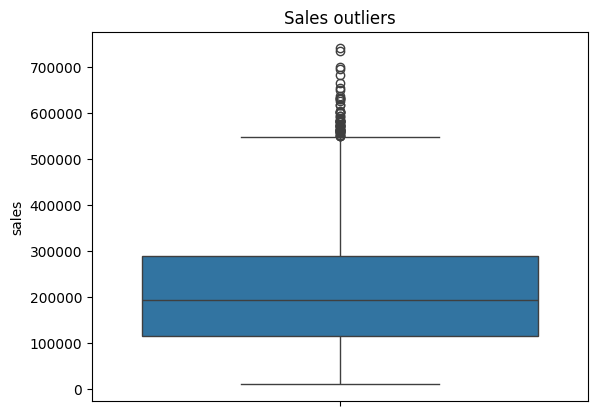

In [23]:
sns.boxplot(data["sales"])
plt.title("Sales outliers")
plt.show()

### 2. Seasonality Decomposition:

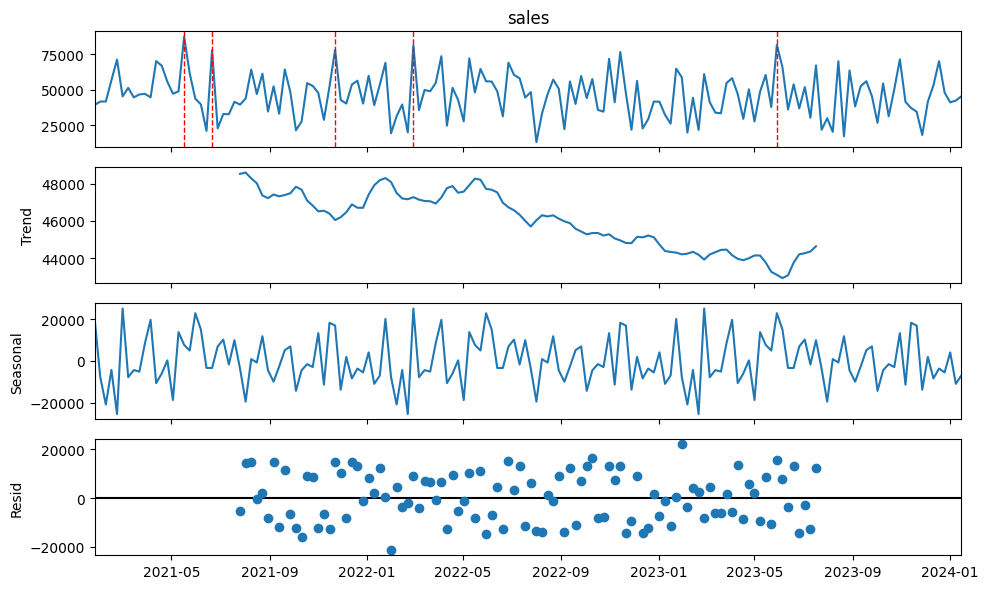

In [24]:
# Filtra por geo y agrega ventas por fecha
geo_df = data[data['geo'] == 'Geo0'].groupby('date')['sales'].sum()
geo_df = geo_df.sort_index()

# Descomposición estacional (weekly, suponiendo 52 puntos/año)
result = seasonal_decompose(geo_df, model='additive', period=52)

# Encontrar fechas de picos de ventas (por ejemplo, top 5)
top_peaks = geo_df.sort_values(ascending=False).head(5).index

# Mostrar gráfico con líneas rojas sobre observed
fig = result.plot()
fig.set_size_inches(10, 6)

# Agregar líneas verticales rojas en picos sobre el primer eje (observed)
observed_ax = fig.axes[0]
for date in top_peaks:
    observed_ax.axvline(x=date, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


## Coefficient Analysis

In [25]:
import statsmodels.api as sm

# Variables seleccionadas
features = [
    'tv_spend', 'radio_spend', 'print_spend',
    'search_spend', 'social_spend',
    'competitor_sales_control', 'sentiment_score_control',"weekofyear",
    'population', 'month_sin', 'month_cos'
]

# Separar X e y
X = data[features]
y = data['sales']

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar modelo OLS
model = sm.OLS(y, X).fit()

# Mostrar resumen con coeficientes y significancia
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1082.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:                -78582.
No. Observations:                6240   AIC:                         1.572e+05
Df Residuals:                    6228   BIC:                         1.573e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Media Mix Modeling for Channel Effectiveness

1. **Adstock & Saturation:**
   Adjusts media spend to capture lagged effects and diminishing returns.

2. **Coefficient Analysis:**
   Quantifies each channel’s marginal effect on sales via regression.

3. **ROI by Channel:**
   Computes sales impact and ROI using model coefficients and average spend.


### 1. Adstock & Saturation

In [26]:
def apply_adstock(series, decay= 0.5):
    result = []
    for i, val in enumerate(series):
        if i == 0:
            result.append(val)
        else:
            result.append(val + decay * result[i-1])

    return pd.Series(result, index=series.index)

spend_channels = ['tv_spend', 'radio_spend', 'print_spend', 'search_spend', 'social_spend']

decay = 0.5
for channel in spend_channels:
    adstocked = apply_adstock(data[channel], decay)
    data[f'{channel}_transformed'] = np.log1p(adstocked)  # Saturación logarítmica

### 2. Coefficient Analysis

In [27]:
features_adstock = ["tv_spend_transformed", "radio_spend_transformed",
    "print_spend_transformed", "search_spend_transformed", "social_spend_transformed",
    'competitor_sales_control', 'sentiment_score_control', 'population',
    'month_sin', 'month_cos'
]

X_adstock = data[features_adstock]
y_adstock = data['sales']
X_adstock = sm.add_constant(X_adstock)

model_adstock = sm.OLS(y_adstock, X_adstock).fit()

print(model_adstock.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1181.
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:                -78597.
No. Observations:                6240   AIC:                         1.572e+05
Df Residuals:                    6229   BIC:                         1.573e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [28]:
features_adstock = [
    "tv_spend_transformed", "radio_spend_transformed", "print_spend_transformed",
    "search_spend_transformed", "social_spend_transformed",
    'competitor_sales_control', 'sentiment_score_control', 'population',
    'month_sin', 'month_cos'
]

# Agregar columnas geo_* como variables adicionales
geo_features = geo_dummies.columns.tolist()
features_with_geo = features_adstock + geo_features

In [29]:
X_with_geo = sm.add_constant(data[features_with_geo])
y_with_geo = data['sales']

model_with_geo = sm.OLS(y_with_geo, X_with_geo).fit()

print(model_with_geo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     295.2
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:36:39   Log-Likelihood:                -78201.
No. Observations:                6240   AIC:                         1.565e+05
Df Residuals:                    6191   BIC:                         1.568e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### 3. ROI by Channel

NameError: name 'df_contrib_roi_geo' is not defined

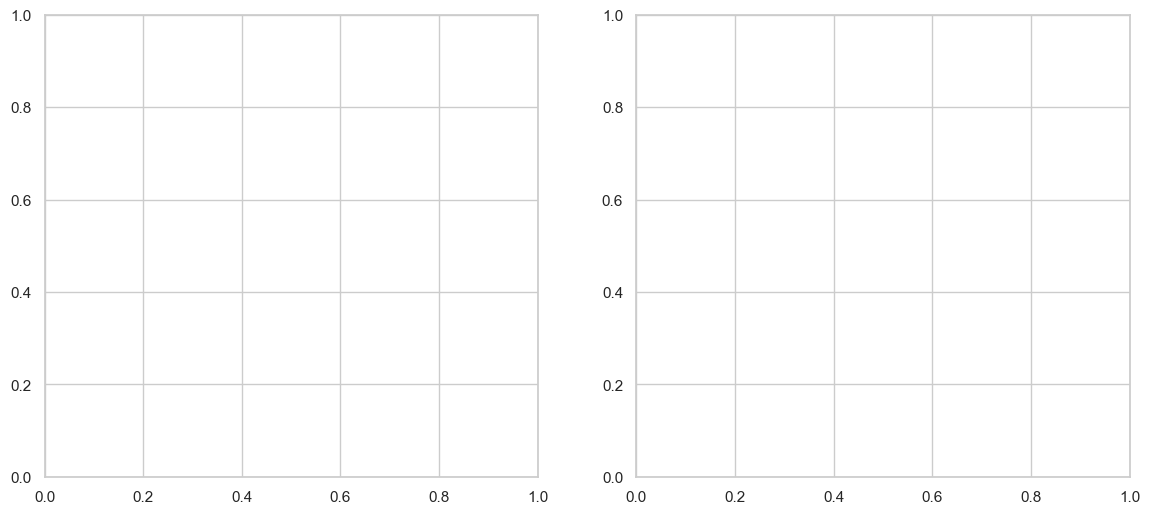

In [ ]:
# Set visual style
sns.set(style="whitegrid")

# Create figure with two horizontal bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Contribution plot
sns.barplot(
    x="contribution", y="channel", hue="channel", legend=False,
    df =df_contrib_roi_geo.sort_values("contribution", ascending=True),
    palette="Blues_d", ax=axes[0]
)
axes[0].set_title("Marginal Contribution per Channel", fontsize=14)
axes[0].set_xlabel("Estimated weekly sales contribution")
axes[0].set_ylabel("Channel")

# ROI plot
sns.barplot(
    x="roi", y="channel", hue="channel", legend=False,
    df = df_contrib_roi_geo.sort_values("roi", ascending=True),
    palette="Greens_d", ax=axes[1]
)
axes[1].set_title("Estimated ROI per Channel", fontsize=14)
axes[1].set_xlabel("Sales per monetary unit invested")
axes[1].set_ylabel("")  # Hide redundant label

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd

# Asegúrate de que estas columnas existen en tu dataset:
# - 'geo'
# - 'month' (o 'weekofyear', 'quarter', etc.)
# - 'tv_spend', ..., 'tv_spend_transformed', etc.

spend_channels = ['tv_spend', 'radio_spend', 'print_spend', 'search_spend', 'social_spend']
coeffs = model_with_geo.params  # Coeficientes del modelo ya ajustado

# Lista para guardar resultados
geo_time_results = []

# Agrupar por geo y mes
for (geo, month), group in data.groupby(['geo', 'month']):
    for ch in spend_channels:
        ch_trans = f'{ch}_transformed'
        coef = coeffs.get(ch_trans, 0)

        avg_trans = group[ch_trans].mean()
        avg_spend = group[ch].mean()

        contribution = coef * avg_trans
        roi = contribution / avg_spend if avg_spend != 0 else None

        geo_time_results.append({
            'geo': geo,
            'month': month,
            'channel': ch,
            'contribution': contribution,
            'roi': roi
        })

# Crear DataFrame final
df_geo_month_roi = pd.DataFrame(geo_time_results)

# Mostrar los primeros resultados
print(df_geo_month_roi.tail())


       geo  month       channel  contribution       roi
2395  Geo9     12      tv_spend  40470.869002  7.887251
2396  Geo9     12   radio_spend  23429.897722  4.254833
2397  Geo9     12   print_spend  12344.823024  6.035257
2398  Geo9     12  search_spend  73959.917293  5.449559
2399  Geo9     12  social_spend  27629.615508  4.901103


In [32]:
df_geo_month_roi.to_csv("./geos.csv", index=False)

In [ ]:
import pymc as pm
import numpy as np

# X: matriz de features (ej. usando df[features_adstock])
# y: vector de ventas

with pm.Model() as mmm_model:
    # Priors para los coeficientes
    intercept = pm.Normal("intercept", mu=0, sigma=1e6)
    betas = pm.Normal("betas", mu=0, sigma=10, shape=X.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Media esperada
    mu = intercept + pm.math.dot(X.values, betas)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y.values)

    # Muestreo MCMC
    trace = pm.sample(1000, tune=1000, target_accept=0.9)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


NameError: name 'X' is not defined